In [112]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

# Exercise 1

In [113]:
class Perceptron:
    """
    A simple Rosenblatt Perceptron implementation.
    """

    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialise the perceptron.

        Parameters:
        ----------
        n_inputs : int
            Number of input features
        learning_rate : float
            Learning rate (alpha) for weight updates
        """
        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

    def step_function(self, x):
        """
        Step activation function.

        Returns 1 if x >= 0, else 0.
        """
        return int(x >= 0)

    def predict(self, inputs):
        """
        Compute the perceptron output for given inputs.

        Parameters:
        ----------
        inputs : array-like
            Input values (x1, x2, ...)

        Returns:
        -------
        int : 0 or 1
        """
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)

    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.

        Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            Training inputs
        y : array-like, shape (n_samples,)
            Target outputs (0 or 1)
        epochs : int
            Number of training epochs
        verbose : bool
            If True, print weights after each epoch

        Returns:
        -------
        list : History of (weights, bias) tuples for each epoch
        """
        history = []

        # Store initial weights
        history.append((self.weights.copy(), self.bias))

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])

                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            # Store weights after this epoch
            history.append((self.weights.copy(), self.bias))

            if verbose:
                print(
                    f"Epoch {epoch + 1}: weights = {self.weights}, "
                    f"bias = {self.bias:.4f}, errors = {total_error}"
                )

            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break

        return history

## Exercise 2

**AND Truth Table**

| A | B | A AND B |
|---|---|---------|
| 0 | 0 |    0    |
| 0 | 1 |    0    |
| 1 | 0 |    0    |
| 1 | 1 |    1    |

### Exercise 2.1

In [114]:
# Define training data for AND
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_and = np.array([0, 0, 0, 1])
print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


### Exercise 2.2

In [115]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")
# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)
# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    if prediction != y_and[i]:
        all_correct = False
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051

Training...

Epoch 1: weights = [-0.12545988  0.35071431], bias = 0.0320, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], bias = -0.0680, errors = 3
Epoch 3: weights = [-0.02545988  0.25071431], bias = -0.1680, errors = 1
Epoch 4: weights = [0.07454012 0.25071431], bias = -0.1680, errors = 2
Epoch 5: weights = [0.17454012 0.25071431], bias = -0.1680, errors = 2
Epoch 6: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 1
Epoch 7: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 0
Converged after 7 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


### Exercise 2.3

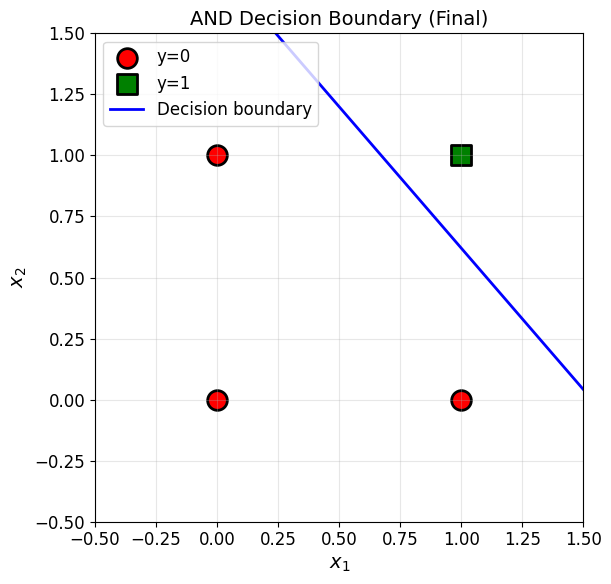

In [116]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.

    Parameters:
    ----------
    X : array-like, shape (n_samples, 2)
        Input data points
    y : array-like, shape (n_samples,)
        Labels (0 or 1)
    weights : array-like, shape (2,)
        Perceptron weights [w1, w2]
    bias : float
        Perceptron bias
    title : str
        Plot title
    ax : matplotlib axis (optional)
        Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))

    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(
                X[i, 0],
                X[i, 1],
                c="red",
                marker="o",
                s=200,
                edgecolors="black",
                linewidths=2,
                label="y=0" if i == 0 else "",
            )
        else:
            ax.scatter(
                X[i, 0],
                X[i, 1],
                c="green",
                marker="s",
                s=200,
                edgecolors="black",
                linewidths=2,
                label="y=1" if i == 3 else "",
            )

    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2
    x1_range = np.linspace(-0.5, 1.5, 100)

    if abs(weights[1]) > 1e-10:  # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, "b-", linewidth=2, label="Decision boundary")
    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color="b", linewidth=2, label="Decision boundary")

    # Formatting
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper left")
    ax.set_aspect("equal")
    return ax

# Test the plotting function with the trained AND perceptron
plot_decision_boundary(
    X_and,
    y_and,
    perceptron_and.weights,
    perceptron_and.bias,
    "AND Decision Boundary (Final)",
)
plt.tight_layout()
plt.show()

### Exercise 2.4

AND - Decision Boundary Evolution:


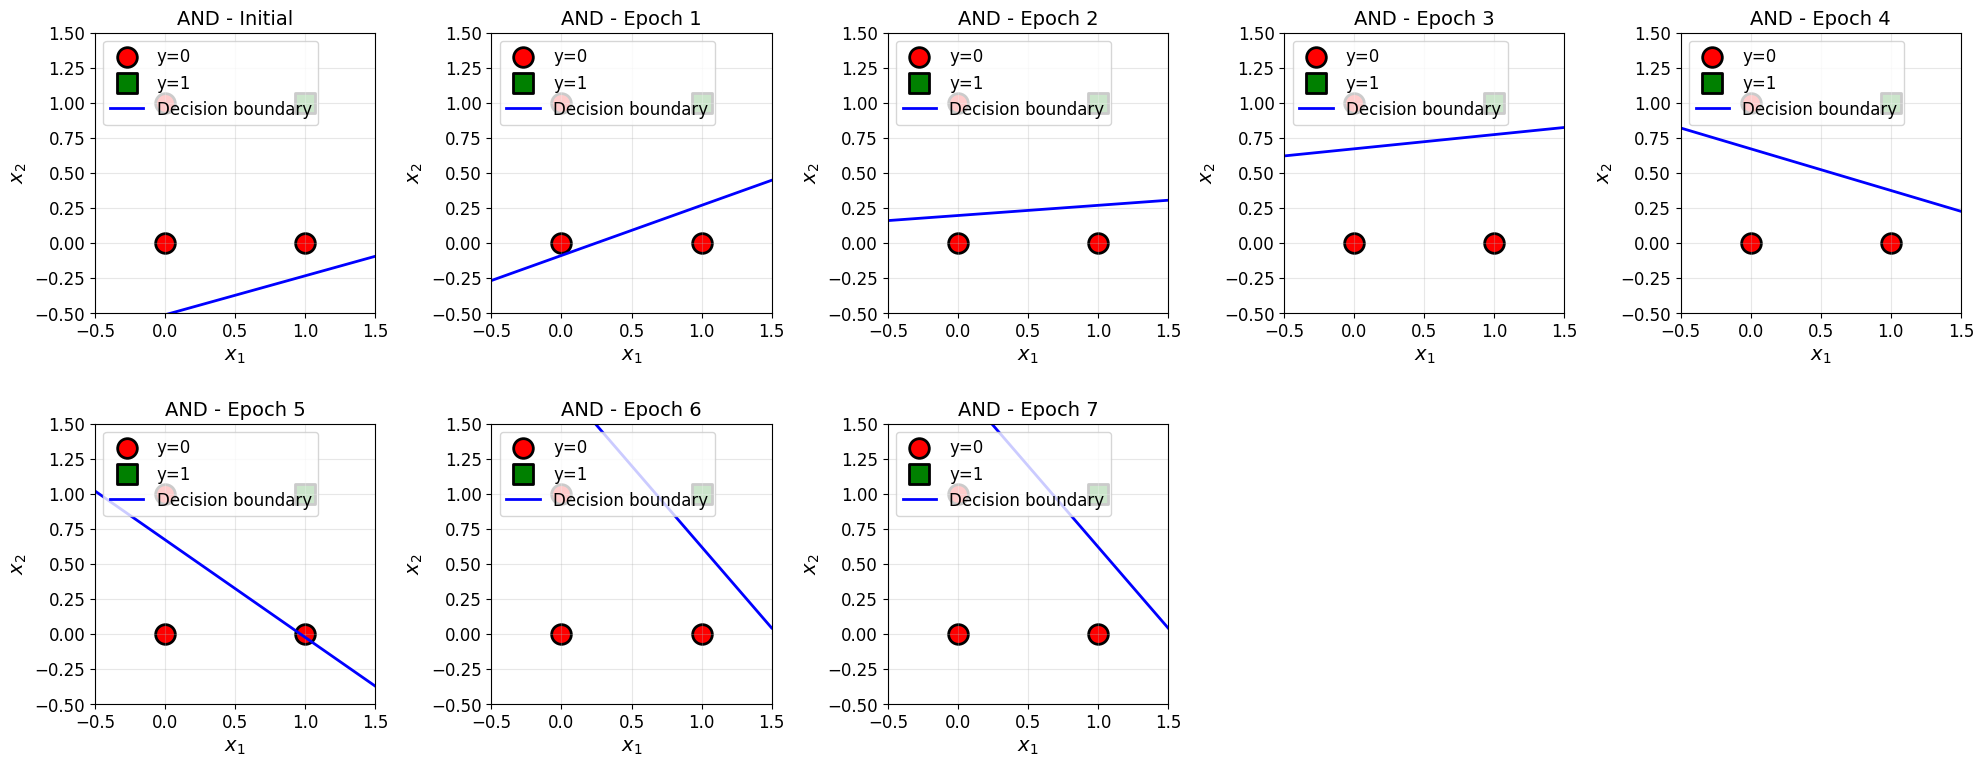

In [117]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across training epochs.
    """
    n_epochs = len(history)

    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols

    _, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]

        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias, f"{title_prefix}{epoch_label}", ax=ax)

    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()

# Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

### Exercise 2.5

In [118]:
import pandas as pd

def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """
    data = {
        "Epoch": [],
        "Weights (w1, w2)": [],
        "Bias": [],
    }

    for epoch, (weights, bias) in enumerate(history):
        label = "Initial" if epoch == 0 else epoch
        data["Epoch"].append(label)
        data["Weights (w1, w2)"].append(f"({weights[0]:.4f}, {weights[1]:.4f})")
        data["Bias"].append(f"{bias:.4f}")

    return pd.DataFrame(data)

print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)

AND - Weight History Table:


,Epoch,"Weights (w1, w2)",Bias
0,Initial,"(-0.1255, 0.4507)",0.2320
1,1,"(-0.1255, 0.3507)",0.0320
2,2,"(-0.0255, 0.3507)",-0.0680
3,3,"(-0.0255, 0.2507)",-0.1680
4,4,"(0.0745, 0.2507)",-0.1680
5,5,"(0.1745, 0.2507)",-0.1680
6,6,"(0.1745, 0.1507)",-0.2680
7,7,"(0.1745, 0.1507)",-0.2680


## Exercise 3

### Exercise 3.1

OR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 1]
Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051
Training...
Epoch 1: weights = [-0.12545988  0.45071431], bias = 0.1320, errors = 1
Epoch 2: weights = [-0.02545988  0.45071431], bias = 0.1320, errors = 2
Epoch 3: weights = [-0.02545988  0.45071431], bias = 0.0320, errors = 1
Epoch 4: weights = [0.07454012 0.45071431], bias = 0.0320, errors = 2
Epoch 5: weights = [0.07454012 0.45071431], bias = -0.0680, errors = 1
Epoch 6: weights = [0.07454012 0.45071431], bias = -0.0680, errors = 0
Converged after 6 epochs!
Testing OR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True
OR - Weight History Table:


,Epoch,"Weights (w1, w2)",Bias
0,Initial,"(-0.1255, 0.4507)",0.2320
1,1,"(-0.1255, 0.4507)",0.1320
2,2,"(-0.0255, 0.4507)",0.1320
3,3,"(-0.0255, 0.4507)",0.0320
4,4,"(0.0745, 0.4507)",0.0320
5,5,"(0.0745, 0.4507)",-0.0680
6,6,"(0.0745, 0.4507)",-0.0680


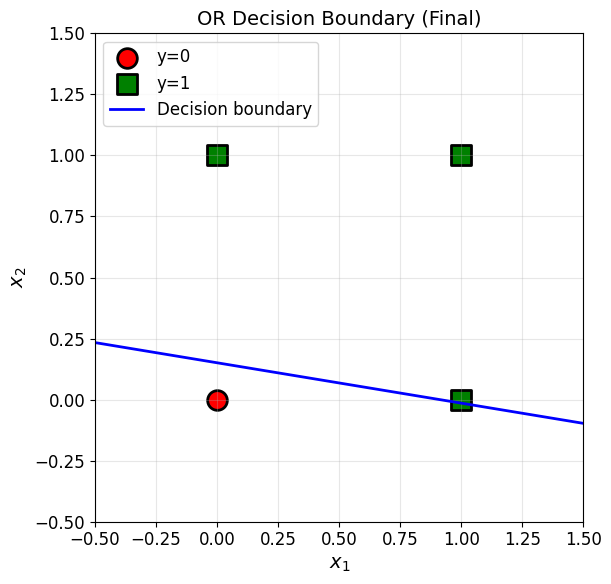

In [119]:
# Exercise 3.1 - OR operation
X_or = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y_or = np.array([0, 1, 1, 1])
print("OR Training Data:")
print("X:")
print(X_or)
print("y:", y_or)

# Create and train perceptron
np.random.seed(42)
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_or.weights)
print("Initial bias:", perceptron_or.bias)
print("Training...")
history_or = perceptron_or.train(X_or, y_or, epochs=10)

# Test on all inputs
print("Testing OR perceptron:")
print("-" * 40)
all_correct_or = True
for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    if prediction != y_or[i]:
        all_correct_or = False
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct_or}")

# Weight history table (Task 3.2)
print("OR - Weight History Table:")
df_or = create_weight_table(history_or)
display(df_or)

# Visualise decision boundary (Task 3.2)
plot_decision_boundary(
    X_or,
    y_or,
    perceptron_or.weights,
    perceptron_or.bias,
    "OR Decision Boundary (Final)",
)
plt.tight_layout()
plt.show()

### Task 3.2

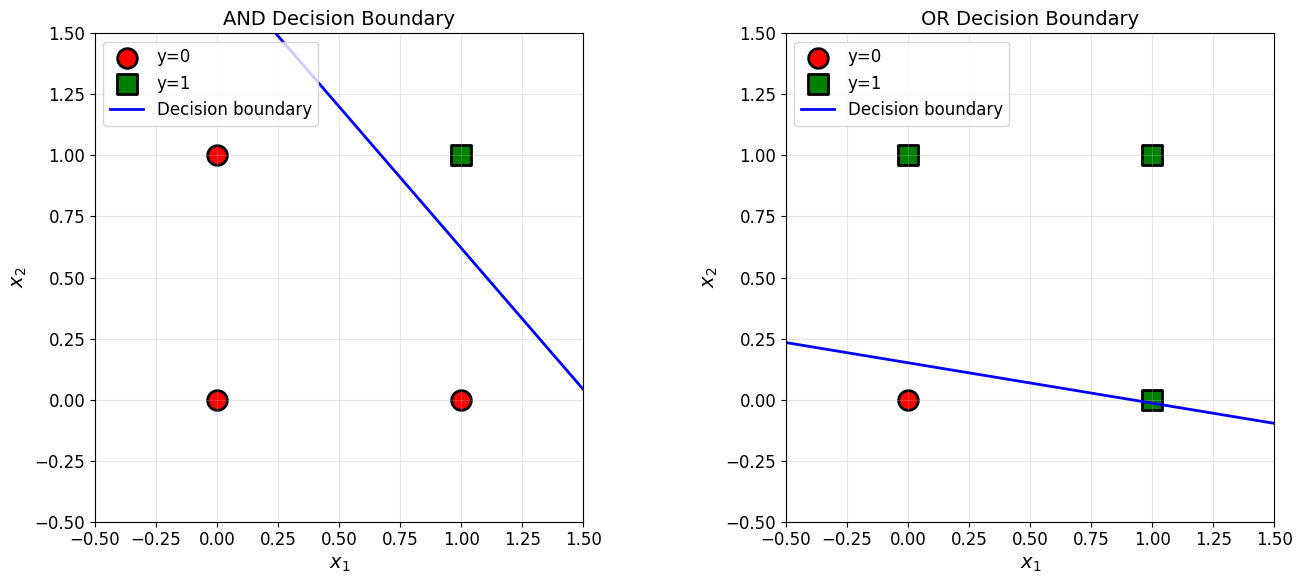

Discussion:-----------------------------------------------------------
AND: The decision boundary separates (1,1) from the other three points.
The line passes 'above' most points, classifying only the top-right as 1.
OR:  The decision boundary separates (0,0) from the other three points.
The line passes 'below' most points, classifying only the origin as 0.
Both are solvable because in each case, the two classes can be separated
by a single straight line - they are LINEARLY SEPARABLE


In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_decision_boundary(
    X_and,
    y_and,
    perceptron_and.weights,
    perceptron_and.bias,
    "AND Decision Boundary",
    ax=ax1,
 )
plot_decision_boundary(
    X_or,
    y_or,
    perceptron_or.weights,
    perceptron_or.bias,
    "OR Decision Boundary",
    ax=ax2,
 )

plt.tight_layout()
plt.show()

# Discussion
print("Discussion:-----------------------------------------------------------")
print("AND: The decision boundary separates (1,1) from the other three points.")
print("The line passes 'above' most points, classifying only the top-right as 1.")
print("OR:  The decision boundary separates (0,0) from the other three points.")
print("The line passes 'below' most points, classifying only the origin as 0.")
print("Both are solvable because in each case, the two classes can be separated")
print("by a single straight line - they are LINEARLY SEPARABLE")

## Exercise 4

### Exercise 4.1

In [121]:
# Exercise 4.1 - XOR training data
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y_xor = np.array([0, 1, 1, 0])
print("XOR Training Data:")
print("X:")
print(X_xor)
print("y:", y_xor)

XOR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]


### Exercise 4.1.2

In [122]:
# Exercise 4.1.2 - XOR perceptron training attempt
print("Attempting to train perceptron for XOR...")
print("(Using 100 epochs to demonstrate non-convergence)")
np.random.seed(42)
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.1)
history_xor = perceptron_xor.train(X_xor, y_xor, epochs=100, verbose=False)
print("Training completed after 100 epochs.")
print(f"Final weights: {perceptron_xor.weights}")
print(f"Final bias: {perceptron_xor.bias:.4f}")

Attempting to train perceptron for XOR...
(Using 100 epochs to demonstrate non-convergence)
Training completed after 100 epochs.
Final weights: [-0.22545988  0.05071431]
Final bias: 0.0320


### Exercise 4.1.3

In [123]:
# Exercise 4.1.3 - XOR perceptron test
print("esting XOR perceptron (single layer):")
print("-" * 39)
correct_count = 0
for i in range(len(X_xor)):
    prediction = perceptron_xor.predict(X_xor[i])
    correct = "✓" if prediction == y_xor[i] else "✗"
    if prediction == y_xor[i]:
        correct_count += 1
    print(f"XOR({X_xor[i][0]}, {X_xor[i][1]}) -> Predicted: {prediction}, Expected: {y_xor[i]} {correct}")
print("-" * 39)
accuracy = correct_count / len(X_xor) * 100
print(f"Accuracy: {correct_count}/{len(X_xor)} = {accuracy:.1f}%")
print("⚠️")
print("  The perceptron CANNOT learn XOR with a single layer!")
print("")

esting XOR perceptron (single layer):
---------------------------------------
XOR(0, 0) -> Predicted: 1, Expected: 0 ✗
XOR(0, 1) -> Predicted: 1, Expected: 1 ✓
XOR(1, 0) -> Predicted: 0, Expected: 1 ✗
XOR(1, 1) -> Predicted: 0, Expected: 0 ✓
---------------------------------------
Accuracy: 2/4 = 50.0%
⚠️
  The perceptron CANNOT learn XOR with a single layer!



### Exercise 4.2

Key Insight: It is impossible to draw a single straight line that separates:
(0,0) and (1,1) -> output 0
(0,1) and (1,0) -> output 1
This is the definition of linear inseparability.


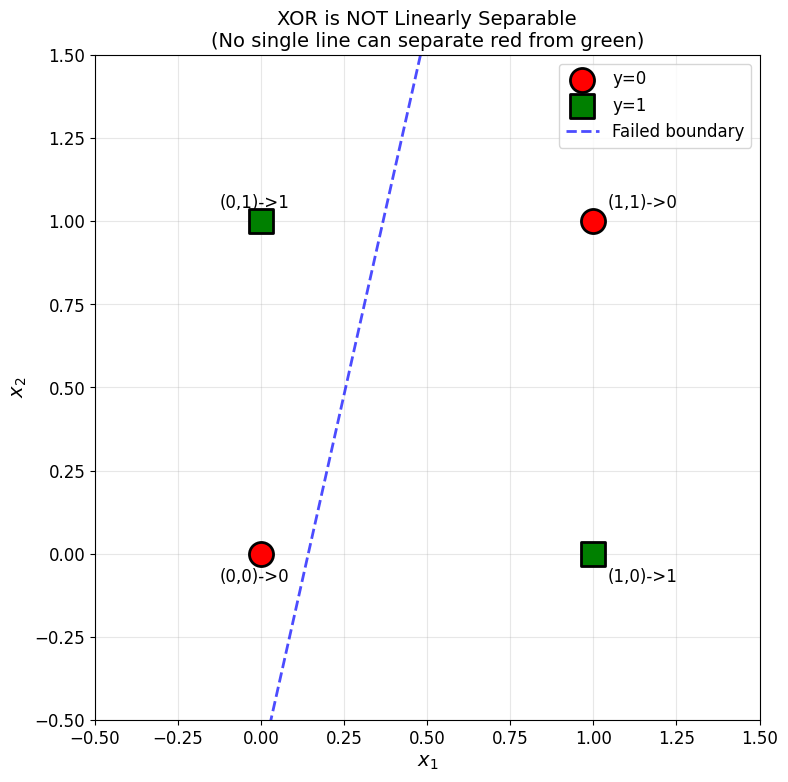

In [124]:
# Exercise 4.2 - XOR linear inseparability
print("Key Insight: It is impossible to draw a single straight line that separates:")
print("(0,0) and (1,1) -> output 0")
print("(0,1) and (1,0) -> output 1")
print("This is the definition of linear inseparability.")

# Visualise XOR data points and a failed straight-line boundary
fig, ax = plt.subplots(figsize=(8, 8))

# Plot points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(
            X_xor[i, 0],
            X_xor[i, 1],
            c="red",
            marker="o",
            s=300,
            edgecolors="black",
            linewidths=2,
            zorder=5,
            label="y=0" if i == 0 else "",
        )
    else:
        ax.scatter(
            X_xor[i, 0],
            X_xor[i, 1],
            c="green",
            marker="s",
            s=300,
            edgecolors="black",
            linewidths=2,
            zorder=5,
            label="y=1" if i == 1 else "",
        )

# Add labels to points
ax.annotate("(0,0)->0", (0, 0), textcoords="offset points", xytext=(-30, -20), fontsize=12)
ax.annotate("(0,1)->1", (0, 1), textcoords="offset points", xytext=(-30, 10), fontsize=12)
ax.annotate("(1,0)->1", (1, 0), textcoords="offset points", xytext=(10, -20), fontsize=12)
ax.annotate("(1,1)->0", (1, 1), textcoords="offset points", xytext=(10, 10), fontsize=12)

# Plot a straight line from the trained XOR perceptron (will not separate correctly)
x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range - (
        perceptron_xor.bias / perceptron_xor.weights[1]
    )
    ax.plot(x1_range, x2_boundary, "b--", linewidth=2, alpha=0.7, label="Failed boundary")

# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("XOR is NOT Linearly Separable\n(No single line can separate red from green)", fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right")
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

### Exercise 4.2

In [ ]:
# Create 3-panel comparison figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
plot_decision_boundary(
    X_and,
    y_and,
    perceptron_and.weights,
    perceptron_and.bias,
    "AND (Separable)",
    ax=ax1,
 )
plot_decision_boundary(
    X_or,
    y_or,
    perceptron_or.weights,
    perceptron_or.bias,
    "OR (Separable)",
    ax=ax2,
 )
plot_decision_boundary(
    X_xor,
    y_xor,
    perceptron_xor.weights,
    perceptron_xor.bias,
    "XOR (Inseparable)",
    ax=ax3,
 )
plt.tight_layout()

plt.savefig("linear_separability_comparison.png", dpi=150, bbox_inches="tight")
plt.show()
print("Figure saved as 'linear_separability_comparison.png'")